In [1]:
#load data
import readfargo3d as fg
import matplotlib.pyplot as plt
import numpy as np

dir1 = './bae2017_1jup1400x512/' #2D
dir2 = './p3disof_1Mjup_1400x512_60zones/'
#dir3 = './p3disof_1Mjup_2800x1024x122/'
#dir4 = './bae2017_1jup5600x2048'
itime1 = 3
r0 = 1.0
fargo1    = fg.frame(itime1,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime1,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3    = fg.frame(itime1,rho=True,vphi=True,vr=True,vtheta=True,dir=dir3) 
#fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=dir3) 
#fargo4i    = fg.frame(1,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)
print('done')

done


Text(0.5, 1.0, 'Surface Density vs r, 30 orbits')

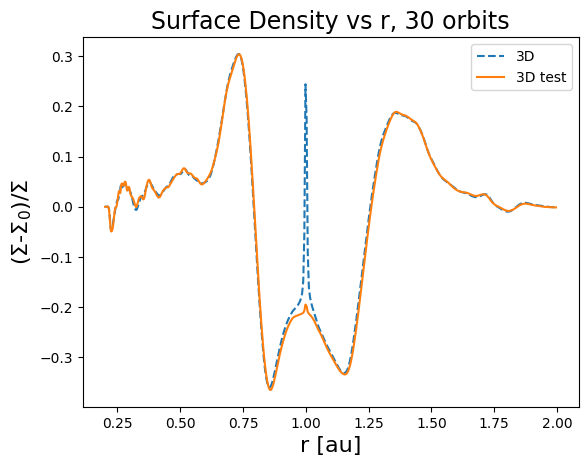

In [17]:
#plotting

rad3d, phi3d, theta3d = np.meshgrid(fargo2.r, fargo2.phi, fargo2.theta) #explain meshgrid?                                                                                                                         

drad3d = np.abs(rad3d[1:,1:,1:]-rad3d[:-1,:-1,:-1]) #shape 1399, 511, 65
dtheta3d = np.abs(theta3d[1:,1:,1:]-theta3d[:-1,:-1,:-1]) #shape 1399, 511, 65

#integration
#rho3d2 = fargo2.rho.sum(axis=2)*fargo2.r
#rho3di2 = fargo2i.rho.sum(axis=2)*fargo2i.r
#rho3d3 = fargo3.rho.sum(axis=2)*fargo3.r
#rho3di3 = fargo3i.rho.sum(axis=2)*fargo3i.r

#mean
rho3d2 = fargo2.rho[:,:,:].mean(axis=2)
rho3di2 = fargo2i.rho[:,:,:].mean(axis=2)
#rho3d3 = fargo3.rho[:,:,:].mean(axis=2)
#rho3di3 = fargo3i.rho[:,:,:].mean(axis=2)

#rho3d2 = fargo2.rho[:,:,-1]
#rho3di2 = fargo2i.rho[:,:,-1]

rho3d2test = (fargo2.rho*(np.cos(theta3d)*rad3d)*2).sum(axis=2) #correct way to integrate?
rho3di2test = (fargo2i.rho*(np.cos(theta3d)*rad3d)*2).sum(axis=2) 

#plt.plot(fargo1.r,((fargo1.rho-fargo1i.rho)/fargo1i.rho).mean(axis=0), label='2D')
plt.plot(fargo2.r,((rho3d2 - rho3di2)/rho3di2).mean(axis=0), label='3D',linestyle='dashed')
plt.plot(fargo2.r,((rho3d2test - rho3di2test)/rho3di2test).mean(axis=0), label='3D test')
#plt.plot(fargo3.r,((rho3d3 - rho3di3)/rho3di3).mean(axis=0), label='3D, 2',linestyle='dashed')
#plt.plot(fargo4.r,((fargo4.rho-fargo4i.rho)/fargo4i.rho).mean(axis=0), label='2D, 700x256')
plt.legend()
#plt.xlim(0.2,100)
#plt.ylim(-1,1)
plt.xlabel('r [au]',fontsize=16)
plt.ylabel('($\Sigma$-$\Sigma _0$)/$\Sigma$',fontsize=16)
plt.title('Surface Density vs r, '+str(itime1*10)+' orbits', fontsize=17)
#plt.savefig('1M_3D2D'+str(itime*10)+'.png',dpi=300,bbox_inches='tight')

10


Text(0.5, 1.0, 'Surface Density, 1MJup disk, time = 30 orbits')

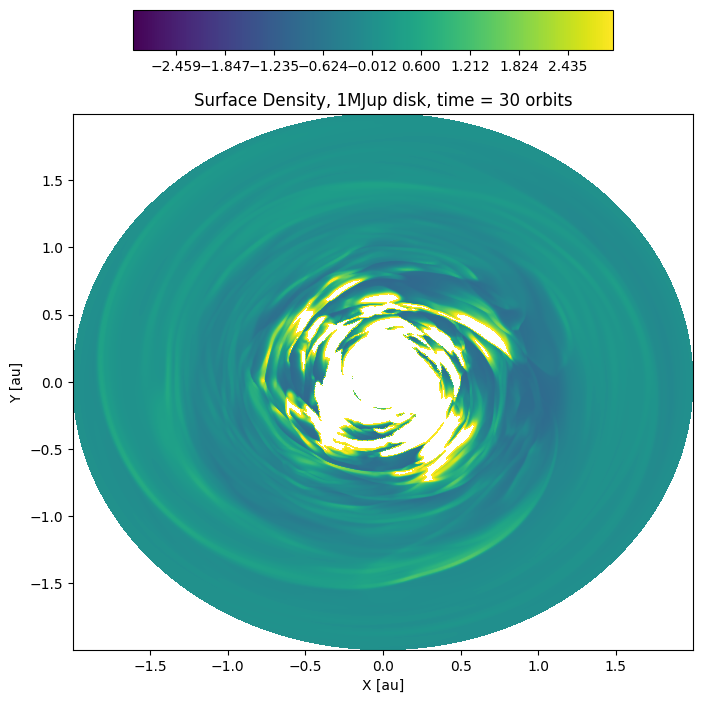

In [19]:
#imaging

phi = fargo2.phi
rad = fargo2.r

rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                         

X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

#integration
#rho3d = fargo3.rho.sum(axis=2)*fargo3.r
#rho3di = fargo3i.rho.sum(axis=2)*fargo3i.r

#slice
rho3d = fargo2.rho[:,:,0]
rho3di = fargo2i.rho[:,:,0]

print(itime*10)

vmin = -3
vmax = 3
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(X, Y,((rho3d - rho3di)/rho3di), levels=levels)
#cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
#fig.colorbar(cp, cax=cax,orientation='horizontal')
#fig.subplots_adjust(top=0.82, bottom=0.15)
#ax.set_xlim(-100,100)
#ax.set_ylim(-100,100)
ax.set_xlabel('X [au]')
ax.set_ylabel('Y [au]')
ax.set_title(f'Surface Density, 1MJup disk, time = {itime1*10} orbits')
#plt.close()
#plt.savefig('3D_image_1MJup'+str(itime*10)+'.png',dpi=300,bbox_inches='tight')

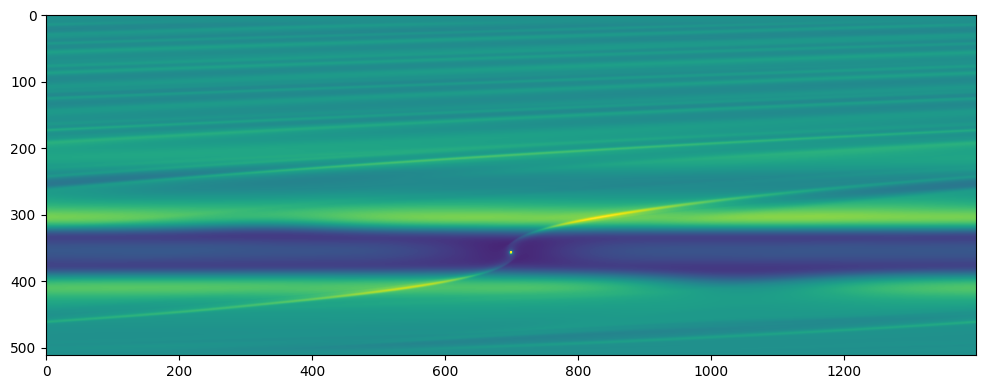

In [81]:
fig, ax = plt.subplots(figsize=(12,12))

ax.imshow((fargo2.rho.sum(axis=2)/fargo2i.rho.sum(axis=2)).T,vmin=0,vmax=2)



10


Text(0.5, 1.0, 'δΣ/Σinit, time = 10 orbits')

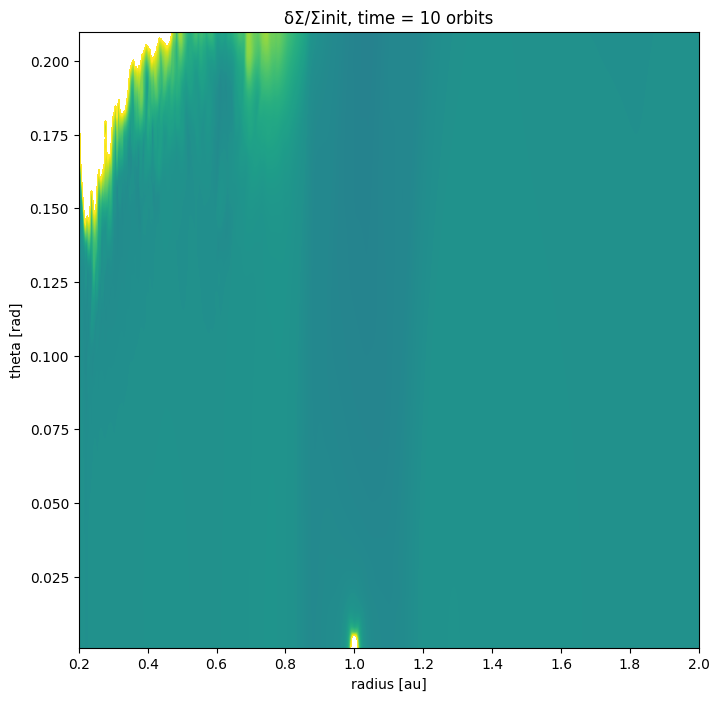

In [16]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './p3disof_1Mjup_2800x1024x122/'
#path = './p3disof_0planet/'
itime = 1
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 

nf = 1
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]
theta= np.loadtxt(path +'domain_z.dat')

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                          
rad   = 0.5*(rad[:-1] + rad[1:])



rad2d, phi2d = np.meshgrid(rad, phi)                                                                                                                          
rad3d , phi3d, theta3d = np.meshgrid(fargo2.r,fargo2.phi,fargo2.theta)
X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)


nx = len(phi)
ny = len(rad)
nz = len(theta)

print(nf*10)

vmin = -.7
vmax = .7
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo2.r, (rad3d*np.cos(theta3d)).mean(axis=0).mean(axis=0),(((fargo2.rho.sum(axis=0)-fargo2i.rho.sum(axis=0))/fargo2i.rho.sum(axis=0))).T, levels=levels)
ax.set_xlim(.2,2)
#ax.set_ylim(1.42,1.72)
ax.set_xlabel('radius [au]')
ax.set_ylabel('theta [rad]')
ax.set_title(f'δΣ/Σinit, time = {nf*10} orbits')
#plt.close()
#plt.savefig('xz3D_image_3mjup.png')

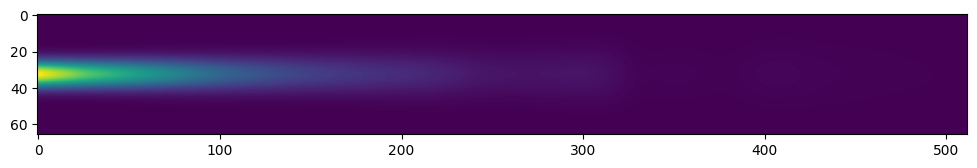

In [6]:

fig, ax = plt.subplots(figsize=(12,12))

ax.imshow(fargo2.rho.mean(axis=0).T)


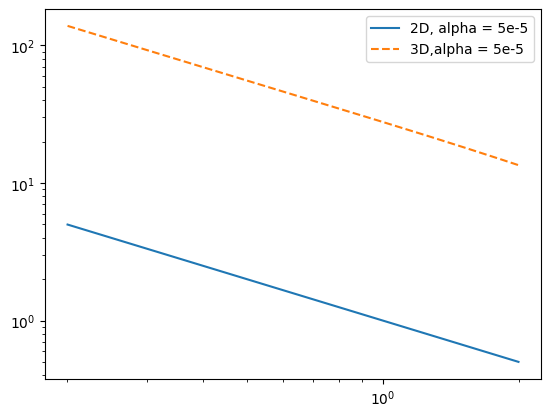

In [7]:
rho3d2 = fargo2.rho.sum(axis=2)*fargo2.r
rho3di2 = fargo2i.rho.sum(axis=2)*fargo2i.r

plt.plot(fargo1.r,fargo1i.rho.mean(axis=0), label='2D, alpha = 5e-5')
plt.plot(fargo2.r,rho3di2.mean(axis=0).T, label='3D,alpha = 5e-5',linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.legend()